# Unduh Package

In [2]:
!pip install vaderSentiment deep-translator tqdm




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.3 MB/s eta 0:00:00


In [3]:
from google.colab import drive
from IPython.display import display
import pandas as pd
import os
import glob

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


# Langkah 1: Terjemahkan ke Bahasa Inggris

In [8]:
# Memanggil data yg sudah di terjemahkan lewat Gsheets
import pandas as pd
terjemahan_df = pd.read_csv('/content/drive/MyDrive/Folder skripsi/Label Sentimen/terjemahan.csv')
display(terjemahan_df.head())

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,tranlate
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"['emang', 'dia', 'yg', 'ajarin', 'ikan', 'sepat', 'ikan', 'lele', 'masih', 'nyangkut', 'bbri', 'le']","['memang', 'dia', 'yang', 'ajarkan', 'ikan', 'sepat', 'ikan', 'lele', 'masih', 'nyangkut', 'bbri', 'boleh']","['memang', 'ajarkan', 'ikan', 'sepat', 'ikan', 'lele', 'nyangkut', 'bbri']",memang ajar ikan sepat ikan lele nyangkut bbri,indeed teach sepat fish catfish get caught in the bbri
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"['habis', 'ini', 'akan', 'borong', 'bbri']","['habis', 'ini', 'akan', 'borong', 'bbri']","['habis', 'borong', 'bbri']",habis borong bbri,sold out bbri
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['bbri', 'padahal', 'saham']",bbri padahal saham,bbri even though shares
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"['saham', 'bbri', 'saat', 'ini', 'memiliki', 'nilai', 'rasio', 'pe', 'yang', 'sangat', 'rendah', 'dalam', 'tahun', 'terakhir', 'saatnya', 'beli']","['saham', 'bbri', 'saat', 'ini', 'memiliki', 'nilai', 'rasio', 'pe', 'yang', 'sangat', 'rendah', 'dalam', 'tahun', 'terakhir', 'saatnya', 'beli']","['saham', 'bbri', 'memiliki', 'nilai', 'rasio', 'pe', 'sangat', 'rendah', 'tahun', 'terakhir', 'saatnya', 'beli']",saham bbri milik nilai rasio pe sangat rendah tahun akhir saat beli,bbri shares have a very low pe ratio value at the end of the year when purchased
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'jg', 'masih', 'good', 'value', 'dibanding', 'bbrpa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yg', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'juga', 'masih', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yang', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['ragu', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'semoga', 'jadi', 'katalist', 'baik', 'mempercepat', 'proses', 'bbri', 'balik', 'kepala']",ragu teknikal weekly chart bakal rebound nih pe ratio good value 

In [9]:
# Agar kalimat dalam tabel dapat terbaca semua
import pandas as pd
pd.set_option('display.max_colwidth', None)
display(terjemahan_df.head())

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,tranlate
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"['emang', 'dia', 'yg', 'ajarin', 'ikan', 'sepat', 'ikan', 'lele', 'masih', 'nyangkut', 'bbri', 'le']","['memang', 'dia', 'yang', 'ajarkan', 'ikan', 'sepat', 'ikan', 'lele', 'masih', 'nyangkut', 'bbri', 'boleh']","['memang', 'ajarkan', 'ikan', 'sepat', 'ikan', 'lele', 'nyangkut', 'bbri']",memang ajar ikan sepat ikan lele nyangkut bbri,indeed teach sepat fish catfish get caught in the bbri
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"['habis', 'ini', 'akan', 'borong', 'bbri']","['habis', 'ini', 'akan', 'borong', 'bbri']","['habis', 'borong', 'bbri']",habis borong bbri,sold out bbri
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['bbri', 'padahal', 'saham']",bbri padahal saham,bbri even though shares
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"['saham', 'bbri', 'saat', 'ini', 'memiliki', 'nilai', 'rasio', 'pe', 'yang', 'sangat', 'rendah', 'dalam', 'tahun', 'terakhir', 'saatnya', 'beli']","['saham', 'bbri', 'saat', 'ini', 'memiliki', 'nilai', 'rasio', 'pe', 'yang', 'sangat', 'rendah', 'dalam', 'tahun', 'terakhir', 'saatnya', 'beli']","['saham', 'bbri', 'memiliki', 'nilai', 'rasio', 'pe', 'sangat', 'rendah', 'tahun', 'terakhir', 'saatnya', 'beli']",saham bbri milik nilai rasio pe sangat rendah tahun akhir saat beli,bbri shares have a very low pe ratio value at the end of the year when purchased
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'jg', 'masih', 'good', 'value', 'dibanding', 'bbrpa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yg', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'juga', 'masih', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yang', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['ragu', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'semoga', 'jadi', 'katalist', 'baik', 'mempercepat', 'proses', 'bbri', 'balik', 'kepala']",ragu teknikal weekly chart bakal rebound nih pe ratio good value 

# Langkah 2: Jalankan VADER untuk kolom yang telah diterjemahkan


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Inisialisasi analyzer
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk ambil skor VADER
def get_vader_sentiment(text):
    if isinstance(text, str):
        scores = analyzer.polarity_scores(text)
        return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])
    else:
        return pd.Series([0.0, 0.0, 0.0, 0.0])  # Atau bisa None jika ingin menandai missing

# Terapkan ke dataframe
terjemahan_df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = \
    terjemahan_df['tranlate'].apply(get_vader_sentiment)


# Langkah 3: Label sentimen dari VADER berdasarkan compound score

In [11]:
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positif'
    elif compound_score <= -0.05:
        return 'negatif'
    else:
        return 'netral'

terjemahan_df['vader_sentiment'] = terjemahan_df['vader_compound'].apply(classify_sentiment)

# Skor Compound

In [12]:
print(terjemahan_df[['text_stemmed', 'tranlate', 'vader_compound', 'vader_sentiment']].head())

                                                                                                                                    text_stemmed  \
0                                                                                                 memang ajar ikan sepat ikan lele nyangkut bbri   
1                                                                                                                              habis borong bbri   
2                                                                                                                             bbri padahal saham   
3                                                                            saham bbri milik nilai rasio pe sangat rendah tahun akhir saat beli   
4  ragu teknikal weekly chart bakal rebound nih pe ratio good value banding beberapa bank moga jadi katalist baik cepat proses bbri balik kepala   

                                                                                                               

In [13]:
display(terjemahan_df.head())

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,tranlate,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"['emang', 'dia', 'yg', 'ajarin', 'ikan', 'sepat', 'ikan', 'lele', 'masih', 'nyangkut', 'bbri', 'le']","['memang', 'dia', 'yang', 'ajarkan', 'ikan', 'sepat', 'ikan', 'lele', 'masih', 'nyangkut', 'bbri', 'boleh']","['memang', 'ajarkan', 'ikan', 'sepat', 'ikan', 'lele', 'nyangkut', 'bbri']",memang ajar ikan sepat ikan lele nyangkut bbri,indeed teach sepat fish catfish get caught in the bbri,0.000,1.000,0.000,0.0000,netral
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"['habis', 'ini', 'akan', 'borong', 'bbri']","['habis', 'ini', 'akan', 'borong', 'bbri']","['habis', 'borong', 'bbri']",habis borong bbri,sold out bbri,0.000,1.000,0.000,0.0000,netral
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['bbri', 'padahal', 'saham']",bbri padahal saham,bbri even though shares,0.000,0.577,0.423,0.2960,positif
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"['saham', 'bbri', 'saat', 'ini', 'memiliki', 'nilai', 'rasio', 'pe', 'yang', 'sangat', 'rendah', 'dalam', 'tahun', 'terakhir', 'saatnya', 'beli']","['saham', 'bbri', 'saat', 'ini', 'memiliki', 'nilai', 'rasio', 'pe', 'yang', 'sangat', 'rendah', 'dalam', 'tahun', 'terakhir', 'saatnya', 'beli']","['saham', 'bbri', 'memiliki', 'nilai', 'rasio', 'pe', 'sangat', 'rendah', 'tahun', 'terakhir', 'saatnya', 'beli']",saham bbri milik nilai rasio pe sangat rendah tahun akhir saat beli,bbri shares have a very low pe ratio value at the end of the year when purchased,0.114,0.667,0.219,0.2975,positif
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'jg', 'masih', 'good', 'value', 'dibanding', 'bbrpa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yg', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'juga', 'masih', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yang', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['ragu', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'good', 'value'

In [16]:
terjemahan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       1255 non-null   object 
 1   full_text        1255 non-null   object 
 2   text_casefolded  1255 non-null   object 
 3   text_clean       1254 non-null   object 
 4   text_tokens      1255 non-null   object 
 5   text_normalized  1255 non-null   object 
 6   text_stopword    1255 non-null   object 
 7   text_stemmed     1254 non-null   object 
 8   tranlate         1255 non-null   object 
 9   vader_neg        1255 non-null   float64
 10  vader_neu        1255 non-null   float64
 11  vader_pos        1255 non-null   float64
 12  vader_compound   1255 non-null   float64
 13  vader_sentiment  1255 non-null   object 
dtypes: float64(4), object(10)
memory usage: 137.4+ KB


# Evaluasi

In [17]:
import pandas as pd
bbri_sentimen_df = pd.read_csv('/content/drive/MyDrive/Folder skripsi/Label Sentimen/bbri_sentimen.csv')
display(bbri_sentimen_df.head())

,created_at,full_text,sentimen
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,negatif
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,positif
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,negatif
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,netral
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,positif


In [18]:
bbri_sentimen_only = bbri_sentimen_df[['sentimen']]
display(bbri_sentimen_only.head())

,sentimen
0,negatif
1,positif
2,negatif
3,netral
4,positif


In [19]:
import pandas as pd
# Menggabungkan dataframe

bbri_gabungan_df = pd.concat([terjemahan_df, bbri_sentimen_only], axis=1)

display(bbri_gabungan_df.head())

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,tranlate,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,sentimen
0,2025-02-01 01:56:24+00:00,@EvaMalca @valentrywandi Emang dia yg ajarin Ikan sepat ikan lele Masih nyangkut bbri le,@evamalca @valentrywandi emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,emang dia yg ajarin ikan sepat ikan lele masih nyangkut bbri le,"['emang', 'dia', 'yg', 'ajarin', 'ikan', 'sepat', 'ikan', 'lele', 'masih', 'nyangkut', 'bbri', 'le']","['memang', 'dia', 'yang', 'ajarkan', 'ikan', 'sepat', 'ikan', 'lele', 'masih', 'nyangkut', 'bbri', 'boleh']","['memang', 'ajarkan', 'ikan', 'sepat', 'ikan', 'lele', 'nyangkut', 'bbri']",memang ajar ikan sepat ikan lele nyangkut bbri,indeed teach sepat fish catfish get caught in the bbri,0.000,1.000,0.000,0.0000,netral,negatif
1,2025-02-01 02:16:00+00:00,Habis ini akan borong BBRI,habis ini akan borong bbri,habis ini akan borong bbri,"['habis', 'ini', 'akan', 'borong', 'bbri']","['habis', 'ini', 'akan', 'borong', 'bbri']","['habis', 'borong', 'bbri']",habis borong bbri,sold out bbri,0.000,1.000,0.000,0.0000,netral,positif
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['bbri', 'padahal', 'saham']",bbri padahal saham,bbri even though shares,0.000,0.577,0.423,0.2960,positif,negatif
3,2025-02-01 02:46:09+00:00,Saham $BBRI saat ini memiliki nilai rasio P/E yang sangat rendah dalam 5 tahun terakhir. Saatnya beli? https://t.co/TzbCjijLHU,saham $bbri saat ini memiliki nilai rasio p/e yang sangat rendah dalam 5 tahun terakhir. saatnya beli? https://t.co/tzbcjijlhu,saham bbri saat ini memiliki nilai rasio pe yang sangat rendah dalam tahun terakhir saatnya beli,"['saham', 'bbri', 'saat', 'ini', 'memiliki', 'nilai', 'rasio', 'pe', 'yang', 'sangat', 'rendah', 'dalam', 'tahun', 'terakhir', 'saatnya', 'beli']","['saham', 'bbri', 'saat', 'ini', 'memiliki', 'nilai', 'rasio', 'pe', 'yang', 'sangat', 'rendah', 'dalam', 'tahun', 'terakhir', 'saatnya', 'beli']","['saham', 'bbri', 'memiliki', 'nilai', 'rasio', 'pe', 'sangat', 'rendah', 'tahun', 'terakhir', 'saatnya', 'beli']",saham bbri milik nilai rasio pe sangat rendah tahun akhir saat beli,bbri shares have a very low pe ratio value at the end of the year when purchased,0.114,0.667,0.219,0.2975,positif,netral
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'jg', 'masih', 'good', 'value', 'dibanding', 'bbrpa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yg', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'juga', 'masih', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yang', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['ragu', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound

In [20]:
# Hapus baris dengan 'netral' di kolom 'vader_sentiment' dan 'sentimen'
bbri_gabungan_df = bbri_gabungan_df[
    (bbri_gabungan_df['vader_sentiment'] != 'netral') &
    (bbri_gabungan_df['sentimen'] != 'netral')
]

display(bbri_gabungan_df.head())
bbri_gabungan_df.info()

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,tranlate,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,sentimen
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['bbri', 'padahal', 'saham']",bbri padahal saham,bbri even though shares,0.000,0.577,0.423,0.2960,positif,negatif
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'jg', 'masih', 'good', 'value', 'dibanding', 'bbrpa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yg', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'juga', 'masih', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yang', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['ragu', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'semoga', 'jadi', 'katalist', 'baik', 'mempercepat', 'proses', 'bbri', 'balik', 'kepala']",ragu teknikal weekly chart bakal rebound nih pe ratio good value banding beberapa bank moga jadi katalist baik cepat proses bbri balik kepala,"i doubt the weekly chart will rebound technically, the ratio is good value compared to several banks, hopefully it will be a good catalyst for the fast process of bri turning its head",0.060,0.676,0.263,0.8126,positif,positif
6,2025-02-01 03:49:57+00:00,@doktermarket BBCA juga lagi dikasih masuk. Saat banyak yang tebar fear (seperti BBRI lalu) berarti waktunya cicil masuk,@doktermarket bbca juga lagi dikasih masuk. saat banyak yang tebar fear (seperti bbri lalu) berarti waktunya cicil masuk,bbca juga lagi dikasih masuk saat banyak yang tebar fear seperti bbri lalu berarti waktunya cicil masuk,"['bbca', 'juga', 'lagi', 'dikasih', 'masuk', 'saat', 'banyak', 'yang', 'tebar', 'fear', 'seperti', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']","['bbca', 'juga', 'lagi', 'dikasih', 'masuk', 'saat', 'banyak', 'yang', 'tebar', 'fear', 'seperti', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']","['bbca', 'dikasih', 'masuk', 'banyak', 'tebar', 'fear', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']",bbca kasih masuk banyak tebar fear bbri lalu arti waktu cicil masuk,bbca give a lot of entry spread fear bbri then meaning installment entry time,0.198,0.802,0.000,-0.4939,negatif,positif
9,2025-02-01 04:57:07+00:00,@EvaMalca @valentrywandi Bbri nyangkut saham lain invest,@evamalca @valentrywandi bbri nyangkut saham lain invest,bbri nyangkut saham lain invest,"['bbri', 'nyangkut', 'saham', 'lain', 'invest']","['bbri', 'nyangkut', 'saham', 'lain', 'invest']","['bbri', 'nyangkut', 'saham', 'invest']",bbri nyangkut saham invest,bbri stuck in investment shares,0.278,0.417,0.306,0.0516,positif,negatif
10,2025-02-01 05:39:54+00:00,BBRI Mau B

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 2 to 1254
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       696 non-null    object 
 1   full_text        696 non-null    object 
 2   text_casefolded  696 non-null    object 
 3   text_clean       695 non-null    object 
 4   text_tokens      696 non-null    object 
 5   text_normalized  696 non-null    object 
 6   text_stopword    696 non-null    object 
 7   text_stemmed     695 non-null    object 
 8   tranlate         696 non-null    object 
 9   vader_neg        696 non-null    float64
 10  vader_neu        696 non-null    float64
 11  vader_pos        696 non-null    float64
 12  vader_compound   696 non-null    float64
 13  vader_sentiment  696 non-null    object 
 14  sentimen         696 non-null    object 
dtypes: float64(4), object(11)
memory usage: 87.0+ KB


In [22]:
# Cek kolom kosong (missing values)
print("Jumlah nilai kosong per kolom sebelum menghapus:")
print(bbri_gabungan_df.isnull().sum())

# Hapus baris yang memiliki setidaknya satu nilai kosong
bbri_gabungan_df.dropna(inplace=True)

print("\nJumlah nilai kosong per kolom setelah menghapus:")
print(bbri_gabungan_df.isnull().sum())

print("\nDataFrame setelah menghapus baris dengan nilai kosong:")
display(bbri_gabungan_df.head())
bbri_gabungan_df.info()


Jumlah nilai kosong per kolom sebelum menghapus:
created_at         0
full_text          0
text_casefolded    0
text_clean         0
text_tokens        0
text_normalized    0
text_stopword      0
text_stemmed       0
tranlate           0
vader_neg          0
vader_neu          0
vader_pos          0
vader_compound     0
vader_sentiment    0
sentimen           0
dtype: int64

Jumlah nilai kosong per kolom setelah menghapus:
created_at         0
full_text          0
text_casefolded    0
text_clean         0
text_tokens        0
text_normalized    0
text_stopword      0
text_stemmed       0
tranlate           0
vader_neg          0
vader_neu          0
vader_pos          0
vader_compound     0
vader_sentiment    0
sentimen           0
dtype: int64

DataFrame setelah menghapus baris dengan nilai kosong:


,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,tranlate,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,sentimen
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['bbri', 'padahal', 'saham']",bbri padahal saham,bbri even though shares,0.000,0.577,0.423,0.2960,positif,negatif
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'jg', 'masih', 'good', 'value', 'dibanding', 'bbrpa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yg', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'juga', 'masih', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yang', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['ragu', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'semoga', 'jadi', 'katalist', 'baik', 'mempercepat', 'proses', 'bbri', 'balik', 'kepala']",ragu teknikal weekly chart bakal rebound nih pe ratio good value banding beberapa bank moga jadi katalist baik cepat proses bbri balik kepala,"i doubt the weekly chart will rebound technically, the ratio is good value compared to several banks, hopefully it will be a good catalyst for the fast process of bri turning its head",0.060,0.676,0.263,0.8126,positif,positif
6,2025-02-01 03:49:57+00:00,@doktermarket BBCA juga lagi dikasih masuk. Saat banyak yang tebar fear (seperti BBRI lalu) berarti waktunya cicil masuk,@doktermarket bbca juga lagi dikasih masuk. saat banyak yang tebar fear (seperti bbri lalu) berarti waktunya cicil masuk,bbca juga lagi dikasih masuk saat banyak yang tebar fear seperti bbri lalu berarti waktunya cicil masuk,"['bbca', 'juga', 'lagi', 'dikasih', 'masuk', 'saat', 'banyak', 'yang', 'tebar', 'fear', 'seperti', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']","['bbca', 'juga', 'lagi', 'dikasih', 'masuk', 'saat', 'banyak', 'yang', 'tebar', 'fear', 'seperti', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']","['bbca', 'dikasih', 'masuk', 'banyak', 'tebar', 'fear', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']",bbca kasih masuk banyak tebar fear bbri lalu arti waktu cicil masuk,bbca give a lot of entry spread fear bbri then meaning installment entry time,0.198,0.802,0.000,-0.4939,negatif,positif
9,2025-02-01 04:57:07+00:00,@EvaMalca @valentrywandi Bbri nyangkut saham lain invest,@evamalca @valentrywandi bbri nyangkut saham lain invest,bbri nyangkut saham lain invest,"['bbri', 'nyangkut', 'saham', 'lain', 'invest']","['bbri', 'nyangkut', 'saham', 'lain', 'invest']","['bbri', 'nyangkut', 'saham', 'invest']",bbri nyangkut saham invest,bbri stuck in investment shares,0.278,0.417,0.306,0.0516,positif,negatif
10,2025-02-01 05:39:54+00:00,BBRI Mau B

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 2 to 1254
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       695 non-null    object 
 1   full_text        695 non-null    object 
 2   text_casefolded  695 non-null    object 
 3   text_clean       695 non-null    object 
 4   text_tokens      695 non-null    object 
 5   text_normalized  695 non-null    object 
 6   text_stopword    695 non-null    object 
 7   text_stemmed     695 non-null    object 
 8   tranlate         695 non-null    object 
 9   vader_neg        695 non-null    float64
 10  vader_neu        695 non-null    float64
 11  vader_pos        695 non-null    float64
 12  vader_compound   695 non-null    float64
 13  vader_sentiment  695 non-null    object 
 14  sentimen         695 non-null    object 
dtypes: float64(4), object(11)
memory usage: 86.9+ KB


In [24]:
bbri_gabungan_df = bbri_gabungan_df[bbri_gabungan_df['sentimen'] != 'tidak berguna']

display(bbri_gabungan_df.head())
bbri_gabungan_df.info()

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,tranlate,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,sentimen
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['bbri', 'padahal', 'saham']",bbri padahal saham,bbri even though shares,0.000,0.577,0.423,0.2960,positif,negatif
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'jg', 'masih', 'good', 'value', 'dibanding', 'bbrpa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yg', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'juga', 'masih', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yang', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['ragu', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'semoga', 'jadi', 'katalist', 'baik', 'mempercepat', 'proses', 'bbri', 'balik', 'kepala']",ragu teknikal weekly chart bakal rebound nih pe ratio good value banding beberapa bank moga jadi katalist baik cepat proses bbri balik kepala,"i doubt the weekly chart will rebound technically, the ratio is good value compared to several banks, hopefully it will be a good catalyst for the fast process of bri turning its head",0.060,0.676,0.263,0.8126,positif,positif
6,2025-02-01 03:49:57+00:00,@doktermarket BBCA juga lagi dikasih masuk. Saat banyak yang tebar fear (seperti BBRI lalu) berarti waktunya cicil masuk,@doktermarket bbca juga lagi dikasih masuk. saat banyak yang tebar fear (seperti bbri lalu) berarti waktunya cicil masuk,bbca juga lagi dikasih masuk saat banyak yang tebar fear seperti bbri lalu berarti waktunya cicil masuk,"['bbca', 'juga', 'lagi', 'dikasih', 'masuk', 'saat', 'banyak', 'yang', 'tebar', 'fear', 'seperti', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']","['bbca', 'juga', 'lagi', 'dikasih', 'masuk', 'saat', 'banyak', 'yang', 'tebar', 'fear', 'seperti', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']","['bbca', 'dikasih', 'masuk', 'banyak', 'tebar', 'fear', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']",bbca kasih masuk banyak tebar fear bbri lalu arti waktu cicil masuk,bbca give a lot of entry spread fear bbri then meaning installment entry time,0.198,0.802,0.000,-0.4939,negatif,positif
9,2025-02-01 04:57:07+00:00,@EvaMalca @valentrywandi Bbri nyangkut saham lain invest,@evamalca @valentrywandi bbri nyangkut saham lain invest,bbri nyangkut saham lain invest,"['bbri', 'nyangkut', 'saham', 'lain', 'invest']","['bbri', 'nyangkut', 'saham', 'lain', 'invest']","['bbri', 'nyangkut', 'saham', 'invest']",bbri nyangkut saham invest,bbri stuck in investment shares,0.278,0.417,0.306,0.0516,positif,negatif
10,2025-02-01 05:39:54+00:00,BBRI Mau B

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 2 to 1254
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       691 non-null    object 
 1   full_text        691 non-null    object 
 2   text_casefolded  691 non-null    object 
 3   text_clean       691 non-null    object 
 4   text_tokens      691 non-null    object 
 5   text_normalized  691 non-null    object 
 6   text_stopword    691 non-null    object 
 7   text_stemmed     691 non-null    object 
 8   tranlate         691 non-null    object 
 9   vader_neg        691 non-null    float64
 10  vader_neu        691 non-null    float64
 11  vader_pos        691 non-null    float64
 12  vader_compound   691 non-null    float64
 13  vader_sentiment  691 non-null    object 
 14  sentimen         691 non-null    object 
dtypes: float64(4), object(11)
memory usage: 86.4+ KB


In [25]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
display(bbri_gabungan_df)

,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,tranlate,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,sentimen
2,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,@marvelle_danny @valentrywandi kenapa harus bbri padahal ada saham lain,kenapa harus bbri padahal ada saham lain,"['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['kenapa', 'harus', 'bbri', 'padahal', 'ada', 'saham', 'lain']","['bbri', 'padahal', 'saham']",bbri padahal saham,bbri even though shares,0.000,0.577,0.423,0.2960,positif,negatif
4,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly chart bakalan rebound nih. PE Ratio jg masih Good Value dibanding bbrpa bank lain. Semoga jadi katalist yg baik untuk mempercepat proses $BBRI balik ke kepala 5 lagi. https://t.co/5LbCRNH7XA,mengapa harus ragu? secara teknikal weekly chart bakalan rebound nih. pe ratio jg masih good value dibanding bbrpa bank lain. semoga jadi katalist yg baik untuk mempercepat proses $bbri balik ke kepala 5 lagi. https://t.co/5lbcrnh7xa,mengapa harus ragu secara teknikal weekly chart bakalan rebound nih pe ratio jg masih good value dibanding bbrpa bank lain semoga jadi katalist yg baik untuk mempercepat proses bbri balik ke kepala lagi,"['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'jg', 'masih', 'good', 'value', 'dibanding', 'bbrpa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yg', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['mengapa', 'harus', 'ragu', 'secara', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'juga', 'masih', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'lain', 'semoga', 'jadi', 'katalist', 'yang', 'baik', 'untuk', 'mempercepat', 'proses', 'bbri', 'balik', 'ke', 'kepala', 'lagi']","['ragu', 'teknikal', 'weekly', 'chart', 'bakalan', 'rebound', 'nih', 'pe', 'ratio', 'good', 'value', 'dibanding', 'beberapa', 'bank', 'semoga', 'jadi', 'katalist', 'baik', 'mempercepat', 'proses', 'bbri', 'balik', 'kepala']",ragu teknikal weekly chart bakal rebound nih pe ratio good value banding beberapa bank moga jadi katalist baik cepat proses bbri balik kepala,"i doubt the weekly chart will rebound technically, the ratio is good value compared to several banks, hopefully it will be a good catalyst for the fast process of bri turning its head",0.060,0.676,0.263,0.8126,positif,positif
6,2025-02-01 03:49:57+00:00,@doktermarket BBCA juga lagi dikasih masuk. Saat banyak yang tebar fear (seperti BBRI lalu) berarti waktunya cicil masuk,@doktermarket bbca juga lagi dikasih masuk. saat banyak yang tebar fear (seperti bbri lalu) berarti waktunya cicil masuk,bbca juga lagi dikasih masuk saat banyak yang tebar fear seperti bbri lalu berarti waktunya cicil masuk,"['bbca', 'juga', 'lagi', 'dikasih', 'masuk', 'saat', 'banyak', 'yang', 'tebar', 'fear', 'seperti', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']","['bbca', 'juga', 'lagi', 'dikasih', 'masuk', 'saat', 'banyak', 'yang', 'tebar', 'fear', 'seperti', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']","['bbca', 'dikasih', 'masuk', 'banyak', 'tebar', 'fear', 'bbri', 'lalu', 'berarti', 'waktunya', 'cicil', 'masuk']",bbca kasih masuk banyak tebar fear bbri lalu arti waktu cicil masuk,bbca give a lot of entry spread fear bbri then meaning installment entry time,0.198,0.802,0.000,-0.4939,negatif,positif
9,2025-02-01 04:57:07+00:00,@EvaMalca @valentrywandi Bbri nyangkut saham lain invest,@evamalca @valentrywandi bbri nyangkut saham lain invest,bbri nyangkut saham lain invest,"['bbri', 'nyangkut', 'saham', 'lain', 'invest']","['bbri', 'nyangkut', 'saham', 'lain', 'invest']","['bbri', 'nyangkut', 'saham', 'invest']",bbri nyangkut saham invest,bbri stuck in investment shares,0.278,0.417,0.306,0.0516,positif,negatif
10,2025-02-01 05:39:54+00:00,BBRI Mau B

In [35]:
bbri_gabungan_df.reset_index(drop=True, inplace=True)
bbri_gabungan_df.index = bbri_gabungan_df.index + 1
display(bbri_gabungan_df.head())


,created_at,full_text,text_casefolded,text_clean,text_tokens,text_normalized,text_stopword,text_stemmed,tranlate,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment,sentimen
1,2025-02-01 02:38:12+00:00,@marvelle_danny @valentrywandi kenapa harus bb...,@marvelle_danny @valentrywandi kenapa harus bb...,kenapa harus bbri padahal ada saham lain,"['kenapa', 'harus', 'bbri', 'padahal', 'ada', ...","['kenapa', 'harus', 'bbri', 'padahal', 'ada', ...","['bbri', 'padahal', 'saham']",bbri padahal saham,bbri even though shares,0.000,0.577,0.423,0.2960,positif,negatif
2,2025-02-01 02:58:44+00:00,Mengapa harus ragu? Secara teknikal weekly cha...,mengapa harus ragu? secara teknikal weekly cha...,mengapa harus ragu secara teknikal weekly char...,"['mengapa', 'harus', 'ragu', 'secara', 'teknik...","['mengapa', 'harus', 'ragu', 'secara', 'teknik...","['ragu', 'teknikal', 'weekly', 'chart', 'bakal...",ragu teknikal weekly chart bakal rebound nih p...,i doubt the weekly chart will rebound technica...,0.060,0.676,0.263,0.8126,positif,positif
3,2025-02-01 03:49:57+00:00,@doktermarket BBCA juga lagi dikasih masuk. Sa...,@doktermarket bbca juga lagi dikasih masuk. sa...,bbca juga lagi dikasih masuk saat banyak yang ...,"['bbca', 'juga', 'lagi', 'dikasih', 'masuk', '...","['bbca', 'juga', 'lagi', 'dikasih', 'masuk', '...","['bbca', 'dikasih', 'masuk', 'banyak', 'tebar'...",bbca kasih masuk banyak tebar fear bbri lalu a...,bbca give a lot of entry spread fear bbri then...,0.198,0.802,0.000,-0.4939,negatif,positif
4,2025-02-01 04:57:07+00:00,@EvaMalca @valentrywandi Bbri nyangkut saham l...,@evamalca @valentrywandi bbri nyangkut saham l...,bbri nyangkut saham lain invest,"['bbri', 'nyangkut', 'saham', 'lain', 'invest']","['bbri', 'nyangkut', 'saham', 'lain', 'invest']","['bbri', 'nyangkut', 'saham', 'invest']",bbri nyangkut saham invest,bbri stuck in investment shares,0.278,0.417,0.306,0.0516,positif,negatif
5,2025-02-01 05:39:54+00:00,BBRI Mau Buyback Saham Dananya Triliunan #info...,bbri mau buyback saham dananya triliunan #info...,bbri mau buyback saham dananya triliunan,"['bbri', 'mau', 'buyback', 'saham', 'dananya',...","['bbri', 'mau', 'buyback', 'saham', 'dananya',...","['bbri', 'mau', 'buyback', 'saham', 'dananya',...",bbri mau buyback saham dana triliun,bbri wants to buy back trillion fund shares,0.000,0.761,0.239,0.2960,positif,positif


Accuracy: 0.6512
Precision (weighted): 0.7149
Recall (weighted): 0.6512
F1-Score (weighted): 0.6332

Confusion Matrix:
[[158 209]
 [ 32 292]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.83      0.43      0.57       367
     positif       0.58      0.90      0.71       324

    accuracy                           0.65       691
   macro avg       0.71      0.67      0.64       691
weighted avg       0.71      0.65      0.63       691



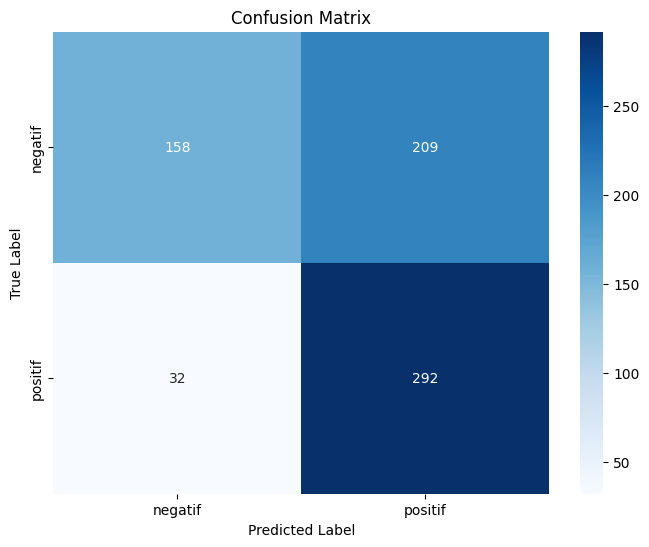

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluasi performa model VADER
y_true = bbri_gabungan_df['sentimen']
y_pred = bbri_gabungan_df['vader_sentiment']

# Hitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted') # Gunakan weighted karena data mungkin tidak seimbang
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Cetak hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

# Opsional: Visualisasi Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_true.unique()), yticklabels=sorted(y_true.unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [37]:
import pandas as pd


X_test = bbri_gabungan_df['text_stemmed']
y_test = bbri_gabungan_df['sentimen']
y_pred = bbri_gabungan_df['vader_sentiment']
skor_sentimen = bbri_gabungan_df['vader_compound']


hasil_df = pd.DataFrame({
    'text': X_test,
    'actual_label': y_test,
    'predicted_label': y_pred,
    'sentiment_score': skor_sentimen
})

display(hasil_df.head())
hasil_df.info()

,text,actual_label,predicted_label,sentiment_score
1,bbri padahal saham,negatif,positif,0.2960
2,ragu teknikal weekly chart bakal rebound nih p...,positif,positif,0.8126
3,bbca kasih masuk banyak tebar fear bbri lalu a...,positif,negatif,-0.4939
4,bbri nyangkut saham invest,negatif,positif,0.0516
5,bbri mau buyback saham dana triliun,positif,positif,0.2960


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 1 to 691
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             691 non-null    object 
 1   actual_label     691 non-null    object 
 2   predicted_label  691 non-null    object 
 3   sentiment_score  691 non-null    float64
dtypes: float64(1), object(3)
memory usage: 21.7+ KB


In [44]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

display(hasil_df)

# Reset display options if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


,text,actual_label,predicted_label,sentiment_score
1,bbri padahal saham,negatif,positif,0.2960
2,ragu teknikal weekly chart bakal rebound nih pe ratio good value banding beberapa bank moga jadi katalist baik cepat proses bbri balik kepala,positif,positif,0.8126
3,bbca kasih masuk banyak tebar fear bbri lalu arti waktu cicil masuk,positif,negatif,-0.4939
4,bbri nyangkut saham invest,negatif,positif,0.0516
5,bbri mau buyback saham dana triliun,positif,positif,0.2960
6,gue kalau jadi direktur bri gue mungkin tingkat jumlah saham treasury bri kalau gue nyangkut saham bbri keluar cepat mungkin saham treasury bbri bawah persen,negatif,positif,0.8176
7,saham boncos crypto cuan benar pegang bbri tahun turun n pegang btc tahun naik,negatif,positif,0.4927
8,bank rakyat indonesia bbri siap rp triliun buyback saham,positif,positif,0.5719
9,saham bbri jeblok lumayan deviden,positif,positif,0.2960
10,saham bbri kan deviden tiap tahun persentase yieldnya per tahun,positif,positif,0.2960


In [45]:
!git clone https://github.com/nugrahamw/Sentimen_Saham.git
%cd Sentimen_Saham

Cloning into 'Sentimen_Saham'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 527.20 KiB | 2.80 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/Sentimen_Saham/Sentimen_Saham
